In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import itertools
import numpy as np
import tqdm
import collections

In [ ]:
train_data_all = pd.read_csv("./Frogs_MFCCs.csv")
train_data_all

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [ ]:
train_data = pd.read_csv("./Frogs_MFCCs.csv")
train_data = train_data.drop(["Family", "Genus", "Species", "RecordID"], axis=1)
train_data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.145668,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.164675,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.150025,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.153120,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895


In [ ]:
def dist(x, y):
  return math.dist(x, y)


def make_dist_mat(df: pd.DataFrame):
  ans = np.array([])
  for _, row in tqdm.tqdm(df.iterrows()):
    dists = map(lambda x: dist(x[1], row), df.iterrows())
    ans = np.append(ans, list(dists))
  return ans


def get_k_th_dists(dist_matrix, k):
  ans = []
  for row in tqdm.tqdm(dist_matrix):
    sorted_list = sorted(row)
    ans.append(sorted_list[k-1])
  return sorted(ans)


def plot_k_th_dists(dist_matrix, k):
  dists = get_k_th_dists(dist_matrix, k)
  fig = plt.figure()
  ax = fig.add_subplot()
  ax.set_xlabel("Points Sorted by Distance to 4th Nearest Neighbor")
  ax.set_ylabel("k_th Nearest Neighbor Distance")
  ax.set_ylim(0.0, 1.5)
  ax.plot(range(len(dists)), dists)
  plt.show()


In [6]:
# 距離行列の計算、めっちゃ時間かかる
dist_matrix = make_dist_mat(train_data)
dist_matrix = dist_matrix.reshape(7195, 7195)


7195it [31:23,  3.82it/s]


# K_thプロット


## K_th = 4

100%|██████████| 7195/7195 [00:15<00:00, 461.24it/s]


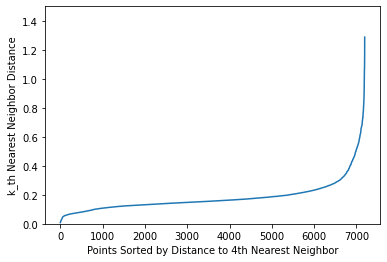

In [60]:
dist_matrix = dist_matrix.reshape(7195, 7195)
plot_k_th_dists(dist_matrix, 4)

## K_th = 30

100%|██████████| 7195/7195 [00:15<00:00, 458.53it/s]


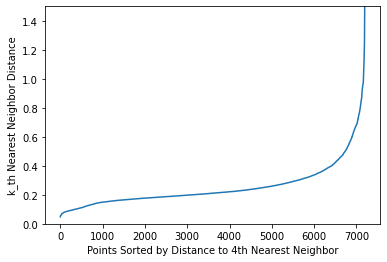

In [61]:
plot_k_th_dists(dist_matrix, 30)

100%|██████████| 7195/7195 [00:15<00:00, 461.24it/s]


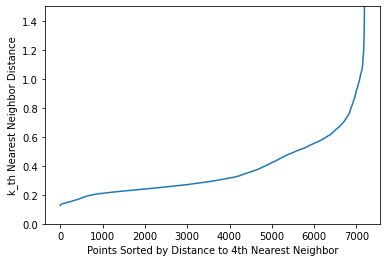

In [62]:
plot_k_th_dists(dist_matrix, 200)

In [34]:
clustering = DBSCAN(eps=0.4, min_samples=60, metric="precomputed").fit(dist_matrix)
len(collections.Counter(clustering.labels_))

2

# MinPtsを変化させる(eps=0.2, 0.4)


In [7]:
data_X = []
data_cluster_num = []
data_noise_count = []

i = 3
for _ in tqdm.tqdm(range(200)):
  clustering = DBSCAN(eps=0.4, min_samples=i, metric="precomputed").fit(dist_matrix)
  data_X.append(i)
  counter = collections.Counter(clustering.labels_)
  data_noise_count.append(counter[-1])
  data_cluster_num.append(len(counter))
  i += 1

100%|██████████| 200/200 [01:21<00:00,  2.47it/s]


## MinPts vs クラスタ数

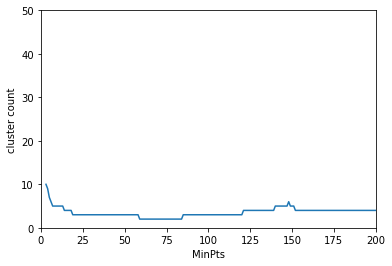

In [10]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_xlabel("MinPts")
ax.set_ylabel("cluster count")
ax.set_xlim(0, 200)
ax.set_ylim(0, 50)
ax.plot(data_X, data_cluster_num)

plt.show()

## MinPts vs noise points数

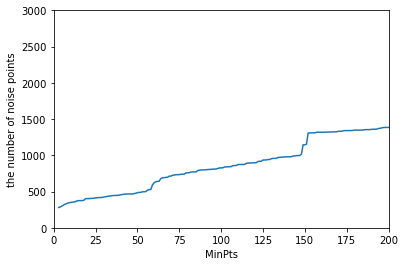

In [12]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_xlabel("MinPts")
ax.set_ylabel("the number of noise points")
ax.set_xlim(0, 200)
ax.set_ylim(0, 3000)
ax.plot(data_X, data_noise_count)

plt.show()


# クラスタリングの評価

In [109]:
def exec_DBSCAN(eps, min_points):
  clustering = DBSCAN(eps=eps, min_samples=min_points, metric="precomputed").fit(dist_matrix)
  counter = collections.Counter(clustering.labels_)

  purity_all = 0
  excluded_noise_num = 0
  for cluster_label in counter.keys():
    arr = []
    for i in range(len(clustering.labels_)):
      # ↓Debug↓
      # if i == 2:
      #   print(train_data_all.iloc[j]["Family"]+ ";" + train_data_all.iloc[j]["Genus"])
      # ↑Debug↑
      if cluster_label == clustering.labels_[i]:
        arr.append(train_data_all.iloc[i]["Family"]+ ";" + train_data_all.iloc[i]["Genus"])

    arr_counter = collections.Counter(arr)
    most_commom_category = arr_counter.most_common(1)[0]
    # print("クラスタ番号:", cluster_label, "  純度: ", most_commom_category[1] / counter[cluster_label])
    
    if cluster_label != -1:
      purity_all += most_commom_category[1]
      excluded_noise_num += counter[cluster_label]

  if excluded_noise_num != 0:
    return purity_all / excluded_noise_num, (len(clustering.labels_) - excluded_noise_num) / len(clustering.labels_), len(counter) - 1
  else:
    return 0, (len(clustering.labels_) - excluded_noise_num) / len(clustering.labels_), len(counter) - 1

In [110]:
X = np.array([0.1, 0.2, 0.4])
Y = np.array([4, 30, 60, 100, 200])

XX, YY = np.meshgrid(X, Y)

for i in range(len(Y)):
  for j in range(len(X)):
    purity, noise_rate, cls_num = exec_DBSCAN(XX[i][j], YY[i][j])
    print("Eps:", XX[i][j], "MinPts:", YY[i][j], "=> ","purity:", purity, "noise rate:", noise_rate, "cls_num:", cls_num)

Eps: 0.1 MinPts: 4 =>  purity: 1.0 noise rate: 0.8647671994440583 cls_num: 24
Eps: 0.2 MinPts: 4 =>  purity: 0.9825229278421872 noise rate: 0.19680333564975677 cls_num: 40
Eps: 0.4 MinPts: 4 =>  purity: 0.6064861734472274 noise rate: 0.040027797081306465 cls_num: 8
Eps: 0.1 MinPts: 30 =>  purity: 1.0 noise rate: 0.9153578874218207 cls_num: 3
Eps: 0.2 MinPts: 30 =>  purity: 0.9993535875888817 noise rate: 0.3549687282835302 cls_num: 10
Eps: 0.4 MinPts: 30 =>  purity: 0.6076809453471197 noise rate: 0.05906879777623349 cls_num: 2
Eps: 0.1 MinPts: 60 =>  purity: 1.0 noise rate: 0.9334259902710216 cls_num: 2
Eps: 0.2 MinPts: 60 =>  purity: 1.0 noise rate: 0.45587213342599026 cls_num: 4
Eps: 0.4 MinPts: 60 =>  purity: 0.6118040766656526 noise rate: 0.08630993745656707 cls_num: 1
Eps: 0.1 MinPts: 100 =>  purity: 1.0 noise rate: 0.980958999305073 cls_num: 1
Eps: 0.2 MinPts: 100 =>  purity: 1.0 noise rate: 0.5452397498262682 cls_num: 3
Eps: 0.4 MinPts: 100 =>  purity: 0.6546796482412061 noise ra

In [101]:
exec_DBSCAN(0.1, 200)

クラスタ番号: -1   純度:  0.5767894371091036


0